# Stroke Pre-Processing and Training Data<a id='4_Pre-Processing_and_Training_Data'></a>

## 3 Introduction<a id='4.2_Introduction'></a>





In this notebook you'll start to build machine learning models. Before even starting with learning a machine learning model, however, start by considering how useful the mean value is as a predictor. This is more than just a pedagogical device. You never want to go to stakeholders with a machine learning model only to have the CEO point out that it performs worse than just guessing the average! Your first model is a baseline performance comparitor for any subsequent model. You then build up the process of efficiently and robustly creating and assessing models against it. The development we lay out may be little slower than in the real world, but this step of the capstone is definitely more than just instructional. It is good practice to build up an understanding that the machine learning pipelines you build work as expected. You can validate steps with your own functions for checking expected equivalence between, say, pandas and sklearn implementations.

## 3.1 Imports<a id='4.3_Imports'></a>

In [25]:
import pandas as pd
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import __version__ as sklearn_version
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve, KFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.dummy import DummyRegressor
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, f1_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression
import datetime
#from library.sb_utils import save_file

## 3.2 Load Data<a id='4.4_Load_Data'></a>

In [2]:
stroke_data = pd.read_csv('../data/stroke_data_cleaned.csv')
stroke_data.head().T

,0,1,2,3,4
gender,1.00,0.000000,1.00,0.00,0.00
age,67.00,61.000000,80.00,49.00,79.00
hypertension,0.00,0.000000,0.00,0.00,1.00
heart_disease,1.00,0.000000,1.00,0.00,0.00
ever_married,1.00,1.000000,1.00,1.00,1.00
avg_glucose_level,228.69,202.210000,105.92,171.23,174.12
bmi,36.60,28.893237,32.50,34.40,24.00
smoking_status,1.00,0.000000,0.00,1.00,0.00
stroke,1.00,1.000000,1.00,1.00,1.00
residence_type,1.00,0.000000,0.00,1.00,0.00


In [3]:
stroke_data.shape

(5109, 10)

## 3.3 Train/Test Split - Logistic Regression

What partition sizes would you have with a 70/30 train/test split?

In [4]:
len(stroke_data) * .7, len(stroke_data) * .3

(3576.2999999999997, 1532.7)

First, we try a basic Logistic Regression:

* Split the data into a training and test (hold-out) set
* Train on the training set, and test for accuracy on the testing set

In [5]:
#Splitting the data into a training and test set
X = stroke_data.drop('stroke', axis=1)
y = stroke_data[['stroke']]

#Applying Standardization using StandardScaler()
columns = X.columns
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
X_std = pd.DataFrame(X_std, columns=columns)
X_std.head()

,gender,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,smoking_status,residence_type
0,1.189791,1.051242,-0.328637,4.184599,0.723678,2.706450,1.001041,1.433107,0.983884
1,-0.840484,0.785889,-0.328637,-0.238972,0.723678,2.121652,-0.000165,-0.697785,-1.016380
2,1.189791,1.626174,-0.328637,4.184599,0.723678,-0.004867,0.468399,-0.697785,-1.016380
3,-0.840484,0.255182,-0.328637,-0.238972,0.723678,1.437473,0.715233,1.433107,0.983884
4,-0.840484,1.581949,3.042866,-0.238972,0.723678,1.501297,-0.635858,-0.697785,-1.016380


In [6]:
#train and test split for standardized features.
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.3, 
                                                    random_state=45)

Lets look at the shape, X-train, y_train head.

In [7]:
X_train.shape, X_test.shape 

((3576, 9), (1533, 9))

In [8]:
X_train.head() 

,gender,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,smoking_status,residence_type
774,-0.840484,-0.540878,-0.328637,-0.238972,0.723678,-1.123449,0.468399,1.433107,-1.016380
2336,-0.840484,1.537723,3.042866,-0.238972,0.723678,1.881372,-0.570902,-0.697785,0.983884
2690,1.189791,1.449272,-0.328637,4.184599,0.723678,2.377611,-0.895684,-0.697785,-1.016380
2430,-0.840484,1.493498,-0.328637,-0.238972,0.723678,1.357085,0.702242,1.433107,-1.016380
3524,-0.840484,0.122505,-0.328637,-0.238972,0.723678,1.238933,-0.596885,1.433107,0.983884


In [9]:
y_train.head()

,stroke
774,0
2336,0
2690,0
2430,0
3524,0


In [10]:
y_train.value_counts() #imbalanced dataset

stroke
0         3400
1          176
dtype: int64

Lets continue the Logistic Regression.

In [17]:
#Applying Logistic Regression on the standardized dataset
lr_std = LogisticRegression(solver='lbfgs') #had to add a solver 'lbfgs'
lr_std.fit(X_train, y_train.values.ravel()) #had to add .values.ravel() to silence warning

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [18]:
y_pred = lr_std.predict(X_test)

#accuracy of logistic regression, on test set w/scaled features
print(lr_std.score(X_test, y_test))

0.9523809523809523


In [19]:
#You logistic regression looks good.  We’re still predicting mostly 0s, which is due to 
#the imbalance.  There’s a couple options:  1.) Mov the prediction threshold down.  
#By default, all the predictions assume that the 0.5 is the threshold, but when 
#we’re imbalanced, it could be lower or higher.

#Move the prediction threshold down, we are imbalanced
y_train.value_counts()

stroke
0         3400
1          176
dtype: int64

In [21]:
#Attempt 1 in moving the prediction threshold down:

#use roc_auc_score() function to calculate true-positive rate & false-positive rate 
lr_auc = roc_auc_score(y_test, y_pred)
lr_auc

0.5

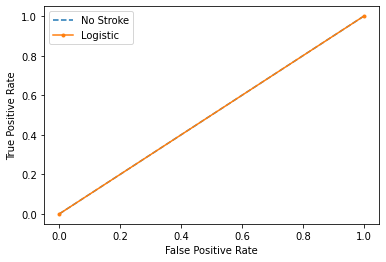

In [26]:
#calculate and plot roc curve
#y_pred = y_pred[:, 1]

false_pos, true_pos, thresholds = roc_curve(y_test, y_pred)

plt.plot([0,1], [0,1], linestyle='--', label='No Stroke')
plt.plot(false_pos, true_pos, marker='.', label='Logistic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [32]:
#got this from stackoverflow, haven't fitted it to my code yet


#There is a little trick that I use, instead of using model.predict(test_data) 
#use model.predict_proba(test_data). Then use a range of values for thresholds 
#to analyze the effects on the prediction;

pred_proba_df = pd.DataFrame(lr_std.predict_proba(X_test))
threshold_list = [0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,.7,.75,.8,.85,.9,.95,.99]
for i in threshold_list:
    print ('\n******** For i = {} ******'.format(i))
    y_test_pred = pred_proba_df.applymap(lambda x: 1 if x>i else 0)
    test_accuracy = accuracy_score(y_test.values().reshape(y_test.values().size,1), y_test_pred.iloc[:,1].values().reshape(y_test_pred.iloc[:,1].values().size,1))
    print('Our testing accuracy is {}'.format(test_accuracy))

    print(confusion_matrix(y_test.as_matrix().reshape(y_test.as_matrix().size,1),
                           y_test_pred.iloc[:,1].as_matrix().reshape(y_test_pred.iloc[:,1].as_matrix().size,1)))


******** For i = 0.05 ******


TypeError: 'numpy.ndarray' object is not callable

In [33]:
#two resources I looked at for threshold help

#https://machinelearningmastery.com/threshold-moving-for-imbalanced-classification/
    
#https://towardsdatascience.com/calculating-and-setting-thresholds-to-optimise-logistic-regression-performance-c77e6d112d7e

#stackoverflow code:
#https://stackoverflow.com/questions/28716241/controlling-the-threshold-in-logistic-regression-in-scikit-learn

In [ ]:
clf = LogisticRegression(solver='lbfgs')

# Fit the model on the training data. y_train 
clf.fit(X_train, y_train) #HAD to add .values.ravel() to silence a warning
#of a "A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel()."

# Print the accuracy from the testing data.
print(accuracy_score(clf.predict(X_test), y_test))

Tuning the model with Cross Validation, 10-fold

In [ ]:
#keep getting errors so commented out


#def cv_score(clf, x, y, score_func=accuracy_score):
    #result = 0
    #nfold = 10
    #for train, test in KFold(nfold).split(x): # split data into train/test groups, 5 times
        #clf.fit(x[train], y[train]) # fit
        #result += score_func(clf.predict(x[test]), y[test]) # evaluate score function on held-out data
    #return result / nfold # average

#clf = LogisticRegression(solver='lbfgs')
#score = cv_score(clf, X_train, y_train)
#print(score)

In [ ]:
penalty = ['l1','l2']
C = [0.001, 0.01, 0.1, 1, 10, 100] 

log_param_grid = {'penalty': penalty, 
                  'C': C}
logreg = LogisticRegression(solver='liblinear')
grid = GridSearchCV(logreg,log_param_grid)

In [ ]:
logreg_pipeline = Pipeline(steps = [('scale',StandardScaler()),('LR',LogisticRegression(C=0.1,penalty='l2',random_state=42))])

In [ ]:
logreg_pipeline.fit(X_train ,y_train)

#logreg.fit(X_train_resh,y_train_resh)

logreg_tuned_pred = logreg_pipeline.predict(X_test)

In [ ]:
print(classification_report(y_test,logreg_tuned_pred))

print('Accuracy Score: ',accuracy_score(y_test,logreg_tuned_pred))
print('F1 Score: ',f1_score(y_test,logreg_tuned_pred))
#print('ROC-AUC Score: ',roc_auc_score(y_test, logreg.predict_proba(X_test)[:,1]))

In [ ]:
clf = RandomForestClassifier() #max_depth=2, random_state=0 add in future
clf.fit(X_train, y_train)
roc_auc_score(y_test, logreg.predict_proba(X_test)[:,1])

In [ ]:
clf = RandomForestClassifier() #max_depth=2, random_state=0 add in future
clf.fit(X_train, y_train)


In [ ]:
accuracy_score(y_test, clf.predict(X_test)) #gets accuracy score.

In [ ]:
roc_auc_score(y_test, clf.predict_proba(X_test)[:,1]) #roc/auc score tells how 
#well model is sorting the data.
#67% of the time between stroke and non-stroke, it gives the probablility to 
#the no-stroke case 67% of the time. ## RERAN AND GOT 70%%
#if it was 0.50 or 50% which is the low bar, above .5 means your model 
#is learning something.

#RERAN AND GOT 70%%

In [ ]:
print(classification_report(y_test, clf.predict(X_test))) #no stroke, right 94% of the time

In [ ]:
#plot histogram of all predicted probabilites, maybe skewd towards 0
#tricky, b/c HUGE imbalance
#need to shift the threshold down, there is tradeoff. If you want to be VERY precise, need to set bar high.

#need to make a threshold. 
pd.Series(clf.predict_proba(X_test)[:,1]).hist()

In [ ]:
#next steps: what the model has learned

#feature importances; which variables are important in the decision. what does the model think is important
#partial dependence plots; try those


#continue on, or fit a new model. 
#either grid search, gradient boosting, random forest.

#full circle 

In [ ]:
#feature importances
#trying this prep data

ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_scaled, y_train)
importances = pd.DataFrame(data={'Attribute': X_train.columns, 'Importance': model.coef_[0]})
importances = importances.sort_values(by='Importance', ascending=False)

In [ ]:
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances', size=20)
plt.xticks(rotation='vertical')
plt.show()

Most important feature is age?
Interesting.

In [ ]:
from sklearn.inspection import partial_dependence
from sklearn.ensemble import GradientBoostingClassifier
#pdp, axes = partial_dependence(clf, X, [0])


In [ ]:

clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(X, y)
features = [0, 1]
plot_partial_dependence(clf, X, features, kind='individual') 

In [ ]:
plot_partial_dependence(clf, X, features, kind='both')

In [ ]:
#Save the 'Name', 'state', and 'Region' columns from the train/test data into 
#names_train and names_test
#Then drop those columns from `X_train` and `X_test`. Use 'inplace=True'

#I am saving these columns from the train/test data into stroke_factors_list, and then into
#factors_train and factors_test
#bmi, hypertension, avg_glucose_level

stroke_factors_list = ['bmi', 'hypertension', 'avg_glucose_level']
factors_train = X_train[stroke_factors_list]
factors_test = X_test[stroke_factors_list]
X_train.drop(columns=stroke_factors_list, inplace=True)
X_test.drop(columns=stroke_factors_list, inplace=True)
X_train.shape, X_test.shape

In [ ]:
#Check the `dtypes` attribute of `X_train` to verify all features are numeric
X_train.dtypes

In [ ]:
#NOTES KEEP HERE


#gradent boost but jeff rec - Random forest! 
# put logistic regression in as well, simplistic binary classification
#now fitting models, predict on test ,look at logreg for height and weight.